In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os # reading the input files we have access to

In [2]:
train_df =  pd.read_csv('E:/Machine Learning/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_00)
test_df = pd.read_csv('E:/Machine Learning/new-york-city-taxi-fare-prediction/test.csv')

In [3]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [7]:
train_df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [8]:
test_df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 1000000
New size: 999990


In [10]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.fare_amount>=0]
print('New size: %d' % len(train_df))

Old size: 999990
New size: 999952


In [11]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000
mean,11.348616,-72.526719,39.929050,-72.528101,39.920086,1.684942
std,9.821249,12.057786,7.626126,11.323777,8.201183,1.323908
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [12]:
train_df['fare_amount'].sort_values(ascending = False)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
361793    400.00
451974    400.00
951810    347.54
578919    287.08
130460    281.05
309769    263.25
719764    262.04
142550    255.00
888472    250.25
351584    250.00
217225    245.41
786490    243.00
149769    240.00
168218    235.00
202499    225.00
612128    220.00
806692    220.00
196990    217.00
784935    215.00
416989    215.00
225249    215.00
285659    214.33
110337    212.00
215662    211.44
979151    210.00
           ...  
671873      0.01
895361      0.00
762802      0.00
331597      0.00
266485      0.00
520715      0.00
670254      0.00
489767      0.00
938020      0.00
27891       0.00
897211      0.00
788466      0.00
957590      0.00
930680      0.00
386734      0.00
47302       0.00
760662      0.00
942215      0.00
431819      0.00
949564      0.00
436658      0.00
175352      0.00
10002       0.00
561786      0.00
681342      0.00
689250      0.00
211455      0.00
211499      0.

In [13]:
train_df['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [14]:
train_df[train_df['passenger_count']>8]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [15]:
print('Old size: %d' % len(train_df))
train_df = train_df.drop(train_df[train_df['passenger_count']>8].index, axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 999952
New size: 999951


In [16]:
train_df['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [17]:
train_df[train_df['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [18]:
print('Old size: %d' % len(train_df))
train_df = train_df.drop(((train_df[train_df['pickup_latitude']<-90])|(train_df[train_df['pickup_latitude']>90])).index, axis='rows')
print('New size: %d' % len(train_df))

Old size: 999951
New size: 999939


In [19]:
print('Old size: %d' % len(train_df))
train_df = train_df.drop(((train_df[train_df['pickup_longitude']<-180])|(train_df[train_df['pickup_longitude']>180])).index, axis='rows')
print('New size: %d' % len(train_df))

Old size: 999939
New size: 999928


In [20]:
print('Old size: %d' % len(train_df))
train_df = train_df.drop(((train_df[train_df['dropoff_latitude']<-90])|(train_df[train_df['dropoff_latitude']>90])).index, axis='rows')
print('New size: %d' % len(train_df))

Old size: 999928
New size: 999920


In [21]:
print('Old size: %d' % len(train_df))
train_df = train_df.drop(((train_df[train_df['dropoff_longitude']<-180])|(train_df[train_df['dropoff_longitude']>180])).index, axis='rows')
print('New size: %d' % len(train_df))

Old size: 999920
New size: 999911


In [22]:
train_df['key'] = pd.to_datetime(train_df['key'])
train_df['pickup_datetime']  = pd.to_datetime(train_df['pickup_datetime'])

In [23]:
test_df['key'] = pd.to_datetime(test_df['key'])
test_df['pickup_datetime']  = pd.to_datetime(test_df['pickup_datetime'])

In [24]:
train_df.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [25]:
test_df.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [26]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_df, test_df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [27]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [28]:
train_df['H_Distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: H_Distance, dtype: float64

In [29]:
test_df['H_Distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: H_Distance, dtype: float64

In [30]:
data = [train_df,test_df]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.weekday
    i['Hour'] = i['pickup_datetime'].dt.hour

In [31]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


Text(0, 0.5, 'Frequency')

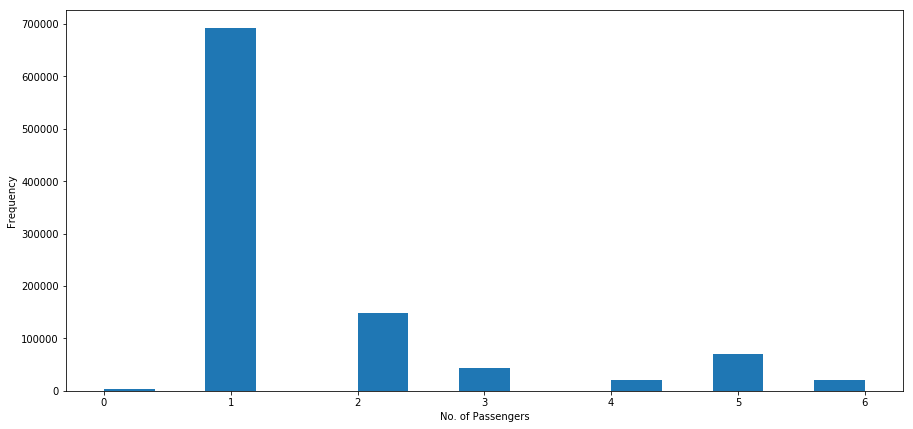

In [32]:
plt.figure(figsize=(15,7))
plt.hist(train_df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

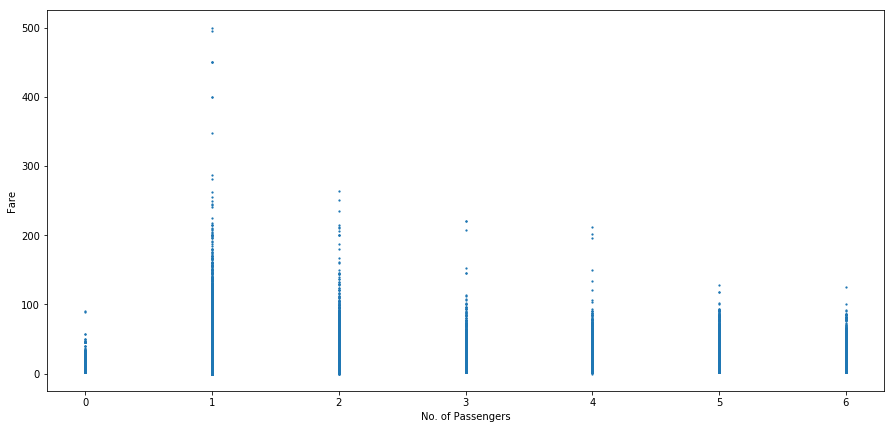

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['passenger_count'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

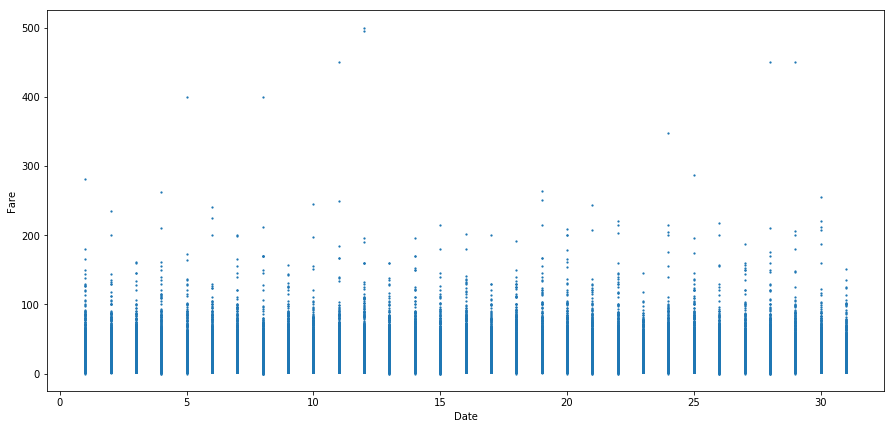

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Date'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

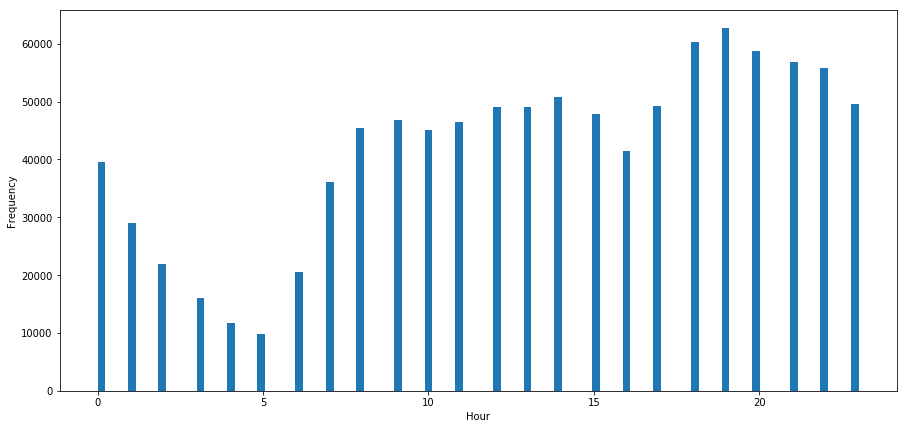

In [35]:
plt.figure(figsize=(15,7))
plt.hist(train_df['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Hour'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train_df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Day of Week'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

In [ ]:
train_df.sort_values(['H_Distance','fare_amount'], ascending=False)

In [ ]:
bins_0 = train_df.loc[(train_df['H_Distance'] == 0), ['H_Distance']]
bins_1 = train_df.loc[(train_df['H_Distance'] > 0) & (train_df['H_Distance'] <= 10),['H_Distance']]
bins_2 = train_df.loc[(train_df['H_Distance'] > 10) & (train_df['H_Distance'] <= 50),['H_Distance']]
bins_3 = train_df.loc[(train_df['H_Distance'] > 50) & (train_df['H_Distance'] <= 100),['H_Distance']]
bins_4 = train_df.loc[(train_df['H_Distance'] > 100) & (train_df['H_Distance'] <= 200),['H_Distance']]
bins_5 = train_df.loc[(train_df['H_Distance'] > 200) & (train_df['H_Distance'] <= 300),['H_Distance']]
bins_6 = train_df.loc[(train_df['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

In [ ]:
dist_bins.columns

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [ ]:
Counter(dist_bins['bins'])

In [ ]:
train_df.loc[((train_df['pickup_latitude']==0) & 
              (train_df['pickup_longitude']==0))&
             ((train_df['dropoff_latitude']!=0) & 
              (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)]

In [ ]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==0) & 
                                       (train_df['pickup_longitude']==0))&
                                      ((train_df['dropoff_latitude']!=0) & 
                                       (train_df['dropoff_longitude']!=0)) & 
                                      (train_df['fare_amount']==0)].index, axis='rows')

In [ ]:
test_df.loc[((test_df['pickup_latitude']==0) & 
           (test_df['pickup_longitude']==0))&
         ((test_df['dropoff_latitude']!=0) & 
          (test_df['dropoff_longitude']!=0))]

In [ ]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']!=0) & 
                              (train_df['pickup_longitude']!=0))&
                             ((train_df['dropoff_latitude']==0) & 
                            (train_df['dropoff_longitude']==0)) & 
                             (train_df['fare_amount']==0)].index, axis='rows')

In [ ]:
test_df.loc[((test_df['pickup_latitude']!=0) & 
          (test_df['pickup_longitude']!=0))&
         ((test_df['dropoff_latitude']==0) &
          (test_df['dropoff_longitude']==0))]

In [ ]:
high_distance = train_df.loc[(train_df['H_Distance']>180)&(train_df['fare_amount']!=0)]

In [ ]:
high_distance

In [ ]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

In [ ]:
high_distance

In [ ]:
train_df.update(high_distance)

In [ ]:
train_df[train_df['H_Distance']==0]

In [ ]:
train_df = train_df.drop(train_df[(train_df['H_Distance']==0)&(train_df['fare_amount']==0)].index, axis = 'rows')

In [ ]:
rush_hour = train_df.loc[(((train_df['Hour']>=6)&
                           (train_df['Hour']<=20))&
                          ((train_df['Day of Week']>=1)&
                           (train_df['Day of Week']<=5))& 
                          (train_df['H_Distance']==0)&
                          (train_df['fare_amount'] < 2.5))]
rush_hour

In [ ]:
train_df=train_df.drop(rush_hour.index, axis='rows')

In [ ]:
non_rush_hour = train_df.loc[(((train_df['Hour']<6)|(train_df['Hour']>20))&
                           ((train_df['Day of Week']>=1)&
                            (train_df['Day of Week']<=5))&
                           (train_df['H_Distance']==0)&
                           (train_df['fare_amount'] < 3.0))]
non_rush_hour

In [ ]:
#Saturday and Sunday all hours
weekends = train_df.loc[((train_df['Day of Week']==0) | (train_df['Day of Week']==6))&
                        (train_df['H_Distance']==0)&
                        (train_df['fare_amount'] < 3.0)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

In [ ]:
scenario_3 = train_df.loc[(train_df['H_Distance']!=0)&
             (train_df['fare_amount']==0)]

In [ ]:
scenario_3.sort_values('H_Distance', ascending=False)

In [ ]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

In [ ]:
scenario_3['fare_amount']

In [ ]:
train_df.update(scenario_3)

In [ ]:
scenario_4 = train_df.loc[(train_df['H_Distance']==0)&
                          (train_df['fare_amount']!=0)]

In [ ]:
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

In [ ]:
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [ ]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [ ]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

In [ ]:
train_df.update(scenario_4_sub)

In [ ]:
train_df.columns

In [ ]:
test_df.columns

In [ ]:
train_df = train_df.drop(['key','pickup_datetime'], axis = 'columns')
test_df = test_df.drop(['key','pickup_datetime'], axis = 'columns')

In [ ]:
train_df.columns

In [ ]:
test_df.columns

In [ ]:
x_train = train_df.iloc[:,train_df.columns!='fare_amount']
y_train = train_df['fare_amount'].values
x_test = test_df

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
#print(rf_predict)

In [ ]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)